Name: **Kartik More**<br>
Div: **BE09-R09**<br>
Roll no: **43149**<br>
Title: **Assignment 4**<br>

*Problem Statement:*

    Use Autoencoder to implement anomaly detection. Build the model by using:
    a. Import required libraries
    b. Upload / access the dataset
    c. Encoder converts it into latent representation
    d. Decoder networks convert it back to the original input
    e. Compile the models with Optimizer, Loss, and Evaluation Metrics

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

## Load the data

In [ ]:
# Download the dataset
PATH_TO_DATA = 'http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv'
data = pd.read_csv(PATH_TO_DATA, header=None)
print(data.shape)
data.head()

(4998, 141)


,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [ ]:
data.shape

(4998, 141)

## Split the data for training and testing

In [ ]:
# last column is the target
# 0 = anomaly, 1 = normal
TARGET = 140

features = data.drop(TARGET, axis=1)
target = data[TARGET]

x_train, x_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, stratify=target
)

In [ ]:
# use case is novelty detection so use only the normal data
# for training
train_index = y_train[y_train == 1].index
train_data = x_train.loc[train_index]

## Scale the data using MinMaxScaler

In [ ]:
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
x_train_scaled = min_max_scaler.fit_transform(train_data.copy())
x_test_scaled = min_max_scaler.transform(x_test.copy())

## Build an AutoEncoder model

In [ ]:
# create a model by subclassing Model class in tensorflow
class AutoEncoder(Model):
  """
  Parameters
  ----------
  output_units: int
    Number of output units
  
  code_size: int
    Number of units in bottle neck
  """

  def __init__(self, output_units, code_size=8):
    super().__init__()
    self.encoder = Sequential([
      Dense(64, activation='relu'),
      Dropout(0.1),
      Dense(32, activation='relu'),
      Dropout(0.1),
      Dense(16, activation='relu'),
      Dropout(0.1),
      Dense(code_size, activation='relu')
    ])
    self.decoder = Sequential([
      Dense(16, activation='relu'),
      Dropout(0.1),
      Dense(32, activation='relu'),
      Dropout(0.1),
      Dense(64, activation='relu'),
      Dropout(0.1),
      Dense(output_units, activation='sigmoid')
    ])
  
  def call(self, inputs):
    encoded = self.encoder(inputs)
    decoded = self.decoder(encoded)
    return decoded

In [ ]:
model = AutoEncoder(output_units=x_train_scaled.shape[1])

In [ ]:
# configurations of model
model.compile(loss='msle', metrics=['mse'], optimizer='adam')

In [ ]:
history = model.fit(
    x_train_scaled,
    x_train_scaled,
    epochs=20,
    batch_size=512,
    validation_data=(x_test_scaled, x_test_scaled)
)

Epoch 1/20
5/5 [==============================] - 1s 50ms/step - loss: 0.0114 - mse: 0.0257 - val_loss: 0.0136 - val_mse: 0.0318
Epoch 2/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0111 - mse: 0.0251 - val_loss: 0.0134 - val_mse: 0.0313
Epoch 3/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0106 - mse: 0.0240 - val_loss: 0.0130 - val_mse: 0.0304
Epoch 4/20
5/5 [==============================] - 0s 11ms/step - loss: 0.0098 - mse: 0.0220 - val_loss: 0.0125 - val_mse: 0.0291
Epoch 5/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0086 - mse: 0.0193 - val_loss: 0.0122 - val_mse: 0.0282
Epoch 6/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0076 - mse: 0.0170 - val_loss: 0.0119 - val_mse: 0.0275
Epoch 7/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0067 - mse: 0.0151 - val_loss: 0.0115 - val_mse: 0.0266
Epoch 8/20
5/5 [==============================] - 0s 11ms/step - loss: 0.0061 - mse: 0.0136 - val

## Plot history

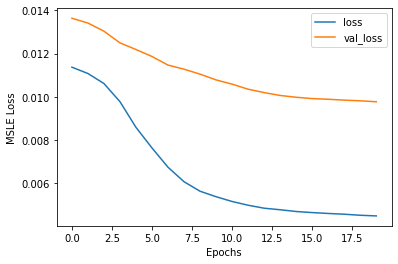

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MSLE Loss')
plt.legend(['loss', 'val_loss'])
plt.show()

## Find threshold

In [ ]:
def find_threshold(model, x_train_scaled):
  reconstructions = model.predict(x_train_scaled)
  # provides losses of individual instances
  reconstruction_errors = tf.keras.losses.msle(reconstructions, x_train_scaled)

  # threshold for anomaly scores
  threshold = np.mean(reconstruction_errors.numpy()) \
      + np.std(reconstruction_errors.numpy())
  return threshold

def find_threshold_method_two(model, x_train_scaled):
  # another method to find threshold
  reconstructions = model.predict(x_train_scaled)
  # provides losses of individual instances
  reconstruction_errors = tf.keras.losses.msle(reconstructions, x_train_scaled)

  threshold_2 = np.percentile(reconstruction_errors, 95)
  return threshold_2

def get_predictions(model, x_test_scaled, threshold):
  predictions = model.predict(x_test_scaled)
  # provides losses of individual instances
  errors = tf.keras.losses.msle(predictions, x_test_scaled)
  # 0 = anomaly, 1 = normal
  anomaly_mask = pd.Series(errors) > threshold
  preds = anomaly_mask.map(lambda x: 0.0 if x == True else 1.0)
  return preds

In [ ]:
threshold = find_threshold(model, x_train_scaled)
print(f"Threshold method one: {threshold}")

threshold_2 = find_threshold_method_two(model, x_train_scaled)
print(f"Threshold method two: {threshold_2}")

73/73 [==============================] - 0s 900us/step
Threshold method one: 0.00974121249111118
73/73 [==============================] - 0s 879us/step
Threshold method two: 0.01361803276867489


In [ ]:
preds = get_predictions(model, x_test_scaled, threshold)
accuracy_score(preds, y_test)

32/32 [==============================] - 0s 942us/step


0.946

## Tuning AutoEncoder using keras tuner



In [ ]:
!pip install -U keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 26.7 MB/s 
     |████████████████████████████████| 1.6 MB 63.7 MB/s 


In [ ]:
import kerastuner as kt

class AutoEncoderTuner(Model):

  def __init__(self, hp, output_units, code_size=8):
    super().__init__()
    dense_1_units = hp.Int('dense_1_units', min_value=16, max_value=72, step=4)
    dense_2_units = hp.Int('dense_2_units', min_value=16, max_value=72, step=4)
    dense_3_units = hp.Int('dense_3_units', min_value=16, max_value=72, step=4)
    dense_4_units = hp.Int('dense_4_units', min_value=16, max_value=72, step=4)
    dense_5_units = hp.Int('dense_5_units', min_value=16, max_value=72, step=4)
    dense_6_units = hp.Int('dense_6_units', min_value=16, max_value=72, step=4)
    
    self.encoder = Sequential([
      Dense(dense_1_units, activation='relu'),
      Dropout(0.1),
      Dense(dense_2_units, activation='relu'),
      Dropout(0.1),
      Dense(dense_3_units, activation='relu'),
      Dropout(0.1),
      Dense(code_size, activation='relu')
    ])
    self.decoder = Sequential([
      Dense(dense_4_units, activation='relu'),
      Dropout(0.1),
      Dense(dense_5_units, activation='relu'),
      Dropout(0.1),
      Dense(dense_6_units, activation='relu'),
      Dropout(0.1),
      Dense(output_units, activation='sigmoid')
    ])
  
  def call(self, inputs):
    encoded = self.encoder(inputs)
    decoded = self.decoder(encoded)
    return decoded


def build_model(hp):
  model = AutoEncoderTuner(hp, 140)
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
  model.compile(
      loss='msle',
      optimizer=Adam(learning_rate=hp_learning_rate),
  )
  return model

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  """Entry point for launching an IPython kernel.


In [ ]:
tuner = kt.Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=20,
    factor=3,
    directory='autoencoder',
    project_name='tuning_autoencoder6'
)

tuner.search(
    x_train_scaled, 
    x_train_scaled, 
    epochs=20, 
    batch_size=512,
    validation_data=(x_test_scaled, x_test_scaled)
)

Trial 30 Complete [00h 00m 03s]
val_loss: 0.009545511566102505

Best val_loss So Far: 0.009011667221784592
Total elapsed time: 00h 01m 02s


In [ ]:
hparams = [f'dense_{i}_units' for i in range(1,7)] + ['learning_rate']
best_hyperparams = tuner.get_best_hyperparameters()
for hps in hparams:
  print(f"{hps}: {best_hyperparams[0][hps]}")

dense_1_units: 52
dense_2_units: 64
dense_3_units: 36
dense_4_units: 28
dense_5_units: 64
dense_6_units: 44
learning_rate: 0.01


In [ ]:
best_model = tuner.get_best_models()[0]
best_model.compile(loss='msle', optimizer=Adam(0.001))

best_model.fit(
    x_train_scaled,
    x_train_scaled,
    epochs=20,
    batch_size=512,
    validation_data=(x_test_scaled, x_test_scaled)
)

Epoch 1/20
5/5 [==============================] - 1s 40ms/step - loss: 0.0031 - val_loss: 0.0090
Epoch 2/20
5/5 [==============================] - 0s 14ms/step - loss: 0.0030 - val_loss: 0.0090
Epoch 3/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0030 - val_loss: 0.0089
Epoch 4/20
5/5 [==============================] - 0s 13ms/step - loss: 0.0030 - val_loss: 0.0090
Epoch 5/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0030 - val_loss: 0.0089
Epoch 6/20
5/5 [==============================] - 0s 13ms/step - loss: 0.0030 - val_loss: 0.0089
Epoch 7/20
5/5 [==============================] - 0s 13ms/step - loss: 0.0030 - val_loss: 0.0089
Epoch 8/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0029 - val_loss: 0.0089
Epoch 9/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0029 - val_loss: 0.0088
Epoch 10/20
5/5 [==============================] - 0s 13ms/step - loss: 0.0029 - val_loss: 0.0089
Epoch 11/20
5/5 [============

In [ ]:
threshold_ = find_threshold(best_model, x_train_scaled)
preds_ = get_predictions(best_model, x_test_scaled, threshold_)
accuracy_score(preds_, y_test)

32/32 [==============================] - 0s 904us/step


0.956